In [1]:
# Imports
import utils.data_exploration as de

import numpy as np
import pandas as pd
import numexpr as ne
import matplotlib.pyplot as plt
from torchmetrics.functional.classification import binary_stat_scores


In [2]:
# Load Dataframe and confusion matrix
def load_df(i):
    df = pd.read_parquet(f"parquet_data/R{i}_df.parquet")
    CM_df = pd.read_parquet(f"parquet_data/R{i}_CM_df.parquet")
    CM = np.load(f"parquet_data/R{i}_CM.npy", allow_pickle=False)

    return df, CM_df, CM


df, CM_df, CM = load_df(5)
conf_matrix_total = np.sum(CM, axis=0)
metrics = de.conf_matrix_metrics(conf_matrix_total)

FALSE NEGATIVES
Total 
       window idx  event_idx  Pred probability  Pred label  True label Result
0               0          0            10.54%           0           1     FN
62              0          1            11.75%           0           1     FN
63              1          1             4.74%           0           1     FN
64              2          1             7.77%           0           1     FN
65              3          1             7.64%           0           1     FN
...           ...        ...               ...         ...         ...    ...
80543           5       1299            33.50%           0           1     FN
80544           6       1299            34.76%           0           1     FN
80545           7       1299            34.71%           0           1     FN
80546           8       1299            41.00%           0           1     FN
80547           9       1299            49.00%           0           1     FN

[13685 rows x 6 columns]


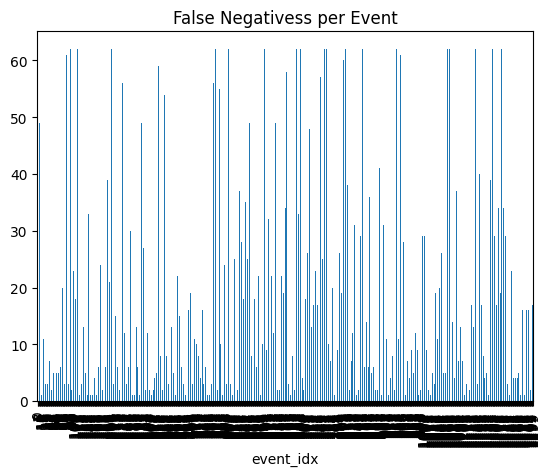

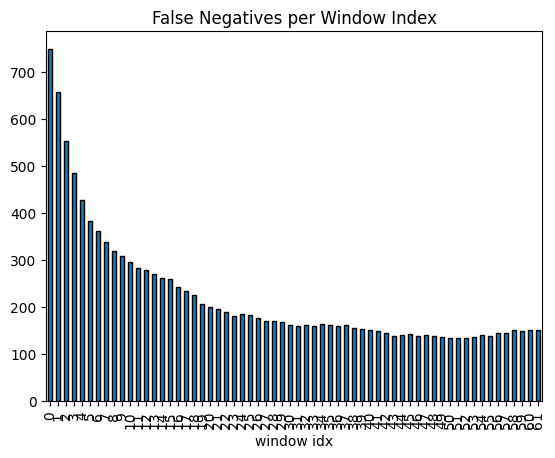

LIMITS RANGE range(0, 6)


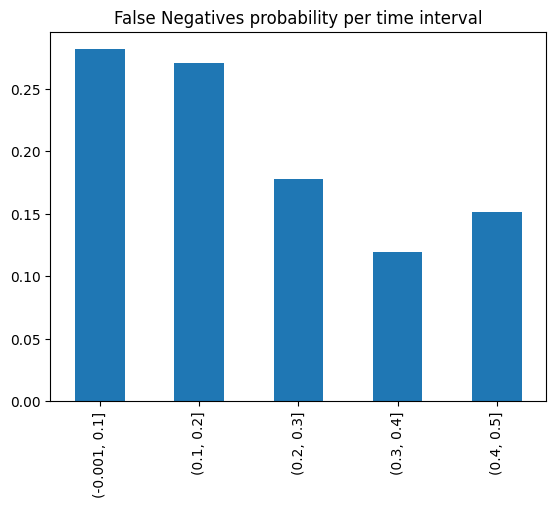

In [3]:
false_positive = df[df["Result"] == "FP"]
false_negative = df[df["Result"] == "FN"]

de.false_events_plots(false_positive, "False Positive")
de.false_events_plots(false_negative, "False Negatives")

In [4]:
print(conf_matrix_total)
metrics = de.conf_matrix_metrics(conf_matrix_total)
de.print_metrics(metrics)
de.plot_confusion_matrix(metrics)

[34179     0 32736 13685 47864]
Total Samples:................80600
True Positives:...............34179
False Positives:..............   0
True Negatives:...............32736
False Negatives:..............13685
Accuracy:.....................  83.0%
True Positive Rate:...........  71.4%
False Positive Rate:..........   0.0%
True Negative Rate:........... 100.0%
Positive Predictive Value:.... 100.0%


C:\Users\Administrador\AppData\Local\Temp\ipykernel_4304\2348130472.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



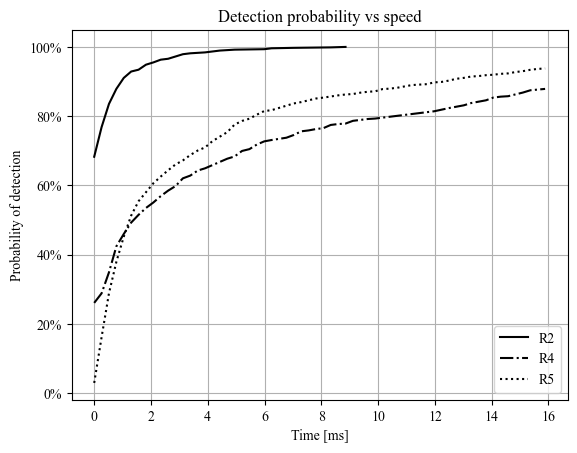

In [9]:
from matplotlib.ticker import FuncFormatter
df2, *_ = load_df(2)
df4, *_ = load_df(4)
df5, *_ = load_df(5)
df2 = de.trip_percentage(df2)
df4 = de.trip_percentage(df4)
df5 = de.trip_percentage(df5)
plt.plot(df2, label='R2', color='black')
plt.plot(df4, label='R4', linestyle="-.", color='black')
plt.plot(df5, label='R5', linestyle=":", color='black')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.title("Detection probability vs speed")
plt.xlabel("Time [ms]")
plt.ylabel("Probability of detection")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.legend()
plt.grid()
plt.show()

In [6]:
p = df[df["True label"] == 1].event_idx.value_counts().shape[0]
n = df[df["True label"] == 0].event_idx.value_counts().shape[0]
print(f"Fault Events (True): {p} \nNon Fault Events (False): {n}")

tp, fp, tn, fn = de.test_result(df)
metrics = de.conf_matrix_metrics(np.array([tp, fp, tn, fn, tp + fn]))
de.print_metrics(metrics)
de.plot_confusion_matrix(metrics)

Fault Events (True): 772 
Non Fault Events (False): 528
True Positives: 724 
False Positives: 0 
True Negatives: 528 
False Negatives: 48
Total Samples:................1300
True Positives:............... 724
False Positives:..............   0
True Negatives:............... 528
False Negatives:..............  48
Accuracy:.....................  96.3%
True Positive Rate:...........  93.8%
False Positive Rate:..........   0.0%
True Negative Rate:........... 100.0%
Positive Predictive Value:.... 100.0%


In [7]:
print(false_negative["Pred probability"].apply(np.floor).min())
print(false_negative["Pred probability"].min())
print(false_negative["Pred probability"].round(3).min())
print(false_negative["Pred probability"].max())
print(false_positive["Pred probability"].apply(np.floor).min())
print(false_positive["Pred probability"].max())
print(false_positive["Pred probability"].round(3).max())

min_range = range(6) if (false_negative["Pred probability"].min() < 0.5) else range(5, 11)
print(min_range)

0.0
0.0104649225
0.01
0.49998796
nan
nan
nan
range(0, 6)


FALSE NEGATIVES
Total 
       window idx  event_idx  Pred probability  Pred label  True label Result
124             0          2             6.72%           0           1     FN
125             1          2             6.39%           0           1     FN
126             2          2             4.59%           0           1     FN
127             3          2             3.31%           0           1     FN
128             4          2             6.31%           0           1     FN
...           ...        ...               ...         ...         ...    ...
80471          57       1297             8.78%           0           1     FN
80472          58       1297             5.27%           0           1     FN
80473          59       1297             3.57%           0           1     FN
80474          60       1297             9.73%           0           1     FN
80475          61       1297            13.52%           0           1     FN

[17827 rows x 6 columns]


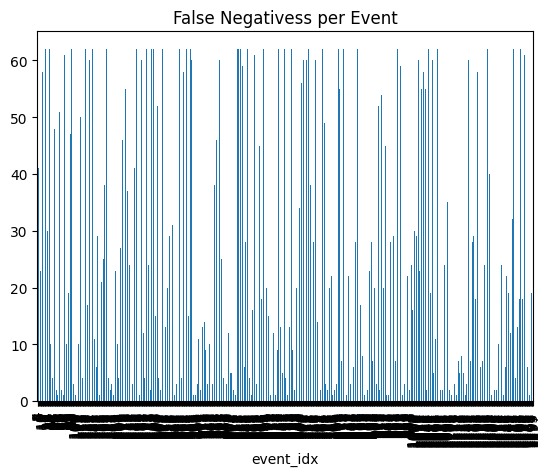

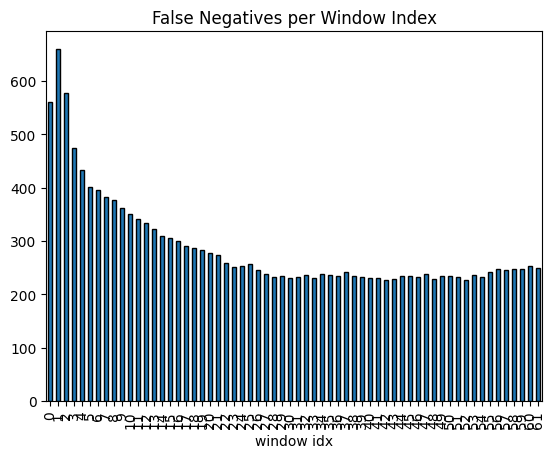

LIMITS RANGE range(0, 6)


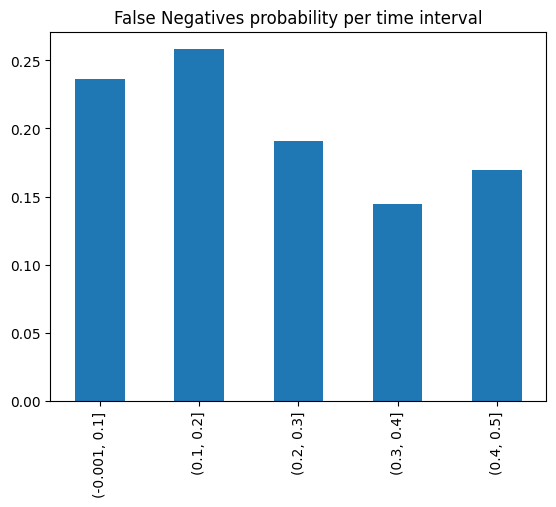

In [13]:
# Data Exploration on False Positives and False Negatives

false_positive = df[df["Result"] == "FP"]
false_negative = df[df["Result"] == "FN"]
de.false_events_plots(false_positive, "False Positive")
de.false_events_plots(false_negative, "False Negatives")